<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.datasets import mnist
from keras.models import Sequential #define neaural model 
from keras.layers import Dense  # allows us to connect preseding layers to subsiqenct layers creating a fully connected network
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical # allows one hot encoding 
import random 

In [ ]:
np.random.seed(0)


In [ ]:
(X_train , Y_train), (X_test, Y_test) = mnist.load_data()  #x and y are tuples 
print(X_train.shape) #(60000, 28, 28) 28 high and 28 wide 
print(X_test.shape) # (10000, 28, 28)
print(X_train.shape) 





(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)


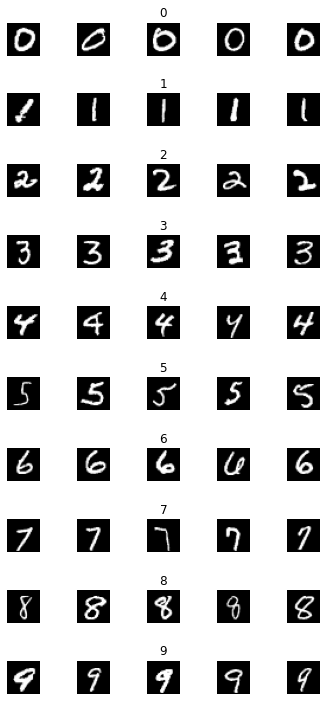

In [ ]:
assert(X_train.shape[0] == Y_train.shape[0]),"The number of images is not equal to the number of labels [0] train" # assert takes in  a single arrgument, it's either true or false, it will run only if it's true, else it will give us a error.
assert(X_test.shape[0] == Y_test.shape[0]),"The number of images is not equal to the number of labels [0] test" # This is the error message that will be shown 
assert(X_train.shape[1: ] == (28,28)),"The dimentions of the images are not 28 by 28  train X"
assert(X_test.shape[1: ] == (28,28)),"The dimentions of the images are not 28 by 28 test X "
#assert is basicaally a try and catch block for python 
# note:Python does have a try and catch block but using assert is quicker. 
number_of_samples = [] # record the amount of images in eac catogories
cols = 5 
num_classes = 10
fig,axis = plt.subplots(nrows =num_classes,ncols= cols,figsize = (5, 10)) # figsize is basicaaly the figure size. 
fig.tight_layout() # helps with the  makes the it look neat.  
# The error TypeError: 'numpy.ndarray' object is not callable means that you tried to call a numpy array as a function.
# X_train(Y_train == j) wrong 
# X_train[Y_train == j] right 
for i in range(cols):
  for j in range(num_classes): 
    x_selected = X_train[Y_train == j] # all images labled 0 will be stored here 
    axis[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), : , :] , cmap = plt.get_cmap("gray")) # setting the range for the random image. 
    axis[j][i].axis("off")
    if (i == 2):
      axis[j][i].set_title(str(j))
      number_of_samples.append(len(x_selected)) # the number of data in each class. 
    #for each colom we are itterating through every row 




[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

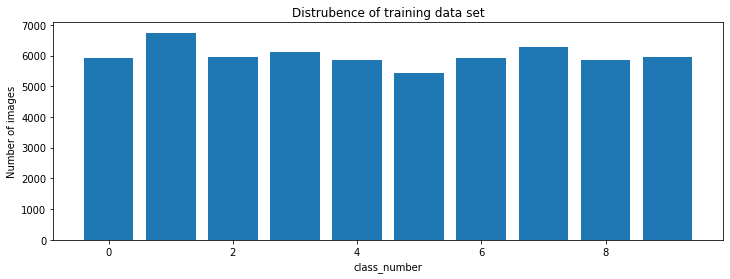

In [ ]:
print(number_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0,num_classes),number_of_samples)
plt.title("Distrubence of training data set")
plt.xlabel("class_number")
plt.ylabel("Number of images")

In [ ]:
#preparing our data for use(Neural Network)
Y_train = to_categorical(Y_train,num_classes) # first argument is our labeled data that needs to be onehot encoded
#the second argument is the total amount of classes in out dataset. 
Y_test = to_categorical(Y_test,num_classes)
#print(Y_train)
#Normilization 
# the reson we chosse to divide 255 because we want to normilize our data to be in a range of 0 and 1
# the maximim pixel value will now be one 255/255 = 1 
# The calculation is used to reduce the variace 
#Variance is the amount that the estimate of the target function will change if different training data was used
X_train  = X_train/255
Y_train = Y_train/255 

In [ ]:
num_pixel = 784
X_train = X_train.reshape(X_train.shape[0] , num_pixel) # flaten the image
X_test = X_test.reshape(X_test.shape[0] , num_pixel) 
#Y_train = Y_train.reshape(num_pixel,Y_train.shape[0])


In [ ]:
def create_model(): 
  model = Sequential()
  model.add(Dense( 10, input_dim = num_pixel, activation= "relu" )) #model.add is a single layer in the neaural network
  model.add(Dense( 10,activation= "relu" ))
  model.add(Dense( num_classes,activation= "Softmax" ))
  model.compile(Adam(lr = 0.1),loss = 'categorical_crossentropy',metrics = "accuracy")
  return model
  

  

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
54/54 [==============================] - 1s 13ms/step - loss: 1.4242 - accuracy: 0.1038 - val_loss: 20.3053 - val_accuracy: 0.1000
Epoch 2/10
54/54 [==============================] - 0s 8ms/step - loss: 41.0299 - accuracy: 0.0999 - val_loss: 196.0269 - val_accuracy: 0.0915
Epoch 3/10
54/54 [==============================] - 0s 7ms/step - loss: 265.6223 - accuracy: 0.1009 - val_loss: 544.6577 - val_accuracy: 0.1045
Epoch 4/10
54/54 [==============================] - 0s 7ms/step - loss: 747.1491 - accuracy: 0.1000 - val_loss: 1278.8054 - val_accuracy: 0.1045
Epoch 5/10
54/54 [==============================] - 0s 8ms/step - loss: 1473.5425 - accuracy: 0.1007 - val_loss: 2423.7151 - val_accuracy: 0.1050
Epoch 6/10
54/54 [==============================] - 0s 7ms/step - loss: 2112.7812 - accuracy: 0.1004 - val_loss: 2371.0071 - val_accuracy: 0.1113
Epoch 7/10
54/54 [==============================] - 0s 7ms/step - loss: 3288.3669 - accuracy: 0.0992 - val_loss: 5977.2212 - val_accur

Text(0.5, 0, 'epcoh')

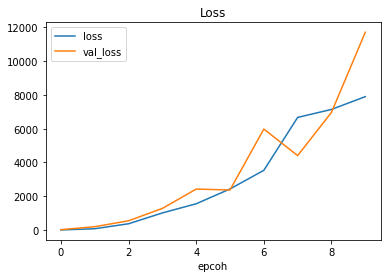

In [ ]:
history = model.fit(X_train,Y_train,validation_split = 0.1,epochs = 10, batch_size= 200, verbose = 1, shuffle = 1)#y_train is the label  # x_train trains it's self 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title("Loss")
plt.xlabel('epcoh')
#0.1 is the validation set using 10 percent of the power 

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 14162.4971 - accuracy: 0.0990 - val_loss: 22674.8477 - val_accuracy: 0.0992
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 27278.9531 - accuracy: 0.1011 - val_loss: 63067.6016 - val_accuracy: 0.1113
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 43204.0742 - accuracy: 0.0986 - val_loss: 43213.7969 - val_accuracy: 0.0952
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 61597.3516 - accuracy: 0.1022 - val_loss: 90532.1562 - val_accuracy: 0.0995
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 80669.1719 - accuracy: 0.1010 - val_loss: 132685.8438 - val_accuracy: 0.0995
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 92775.5000 - accuracy: 0.1005 - val_loss: 163572.0000 - val_accuracy: 0.1050
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 125022.4844 - accuracy: 

Text(0.5, 0, 'epcoh')

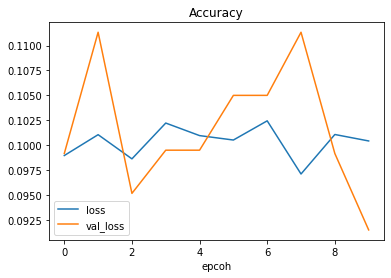

In [ ]:
history = model.fit(X_train,Y_train,validation_split = 0.1,epochs = 10, batch_size= 200, verbose = 1, shuffle = 1)#y_train is the label  # x_train trains it's self 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss'])
plt.title("Accuracy")
plt.xlabel('epcoh')
#0.1 is the validation set using 10 percent of the power 

In [ ]:
score = model.evaluate(X_test,Y_test,verbose= 0)
print(type(score))
print("Test Score:", score[1])
print("Test accuracy:", score[1])

<class 'list'>
Test Score: 0.08919999748468399
Test accuracy: 0.08919999748468399
[17089097728.0, 0.08919999748468399]


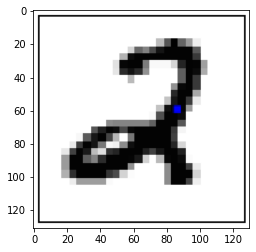

In [ ]:
import requests
from PIL import Image #from python image liberay we are importing the image module 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream= True)
img = Image.open(response.raw)
plt.imshow(img)

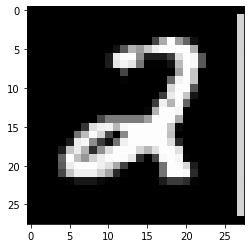

In [ ]:
import cv2 
img_array = np.asarray(img) # this converts any input into an array, in our case it is converting an image into a  numpy array
#print(img_array.shape)
resized = cv2.resize(img_array,(28,28)) # resized the image to 28 by 28 image 
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY) # coverts it into a  gray_scale
#print(gray_scale.shape) # we got (28, 28, 3) before running it which the the 3 denores that it is a 3d image meaning it's not converted into gray scale.
image = cv2.bitwise_not(gray_scale) # inverts the pixel intensity
plt.imshow(image,cmap = plt.get_cmap("gray"))

In [ ]:
image = image/255 
image = image.reshape(1, 784)


In [ ]:
#predection 
predection = model.predict_classes(image) # predict according to the which class it falls under. 
print("Prediction: ",str(predection)) # wrong pridcition, change the amount of nodes or add another layer to. 

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction:  [5]
